# Deep inside: Autoencoders

4 types of autoencoders are described using the Keras framework and the MNIST dataset

1. Vanilla autoencoders
2. Multilayer autoencoder
3. Convolutional autoencoder
4. Regularized autoencoder

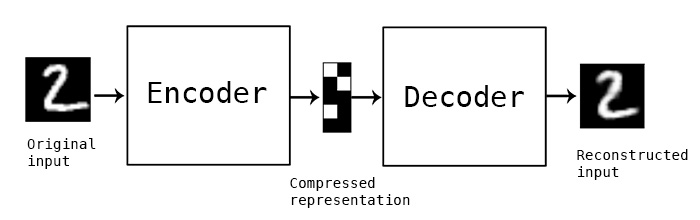

## Import the libraries

In [1]:
#pip install tensorflow

In [2]:
#pip install keras 

In [62]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from tensorflow import keras

#from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [63]:
from collections import Counter

## Load the data

We don't need the labels as the autoencoders are unsupervised network

In [64]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## Normalize the data

We want the pixels values between 0 and 1 instead of between 0 and 255

In [65]:
X_train = X_train.astype("float32")/255. # In this process input is normalize like 0 to 1. That the reason of "/255".
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Flatten the images for the Fully-Connected Networks

In [66]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

___

# **Vanilla Autoencoder**

### Create the network

The first network is the most simple autoencoder. It has three layers : Input - encoded - decoded

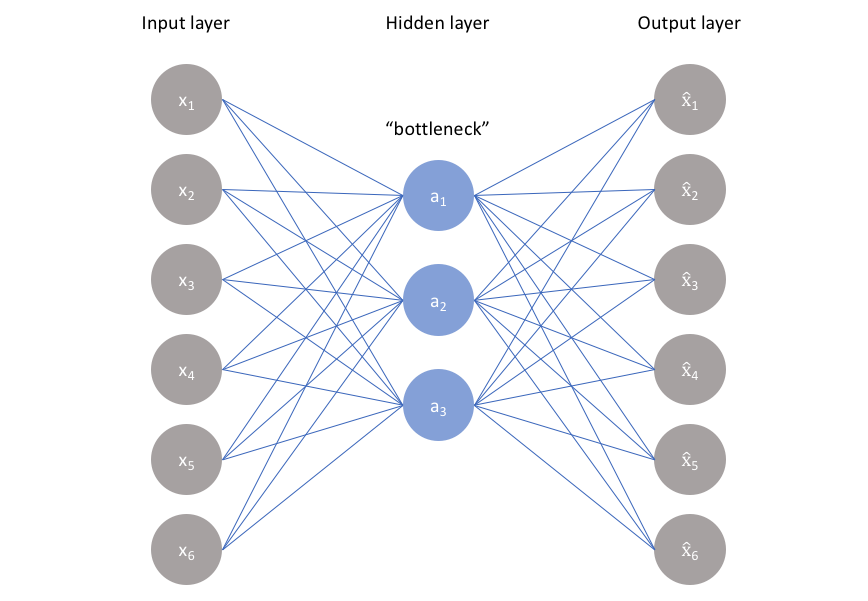

In [11]:
input_size = 784
hidden_size = 64
output_size = 784

In [12]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h) # It is used sigmoid "because output get 0 to 1" get a loss easy to do that(x-x^).

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')


### Train

In [13]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0436 - val_loss: 0.0213
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0166 - val_loss: 0.0124
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0105 - val_loss: 0.0084
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 0.0065
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0061 - val_loss: 0.0055


In [14]:
X_test_pred=autoencoder.predict_on_batch(X_test)

In [15]:
distances=np.sum(np.square(X_test-X_test_pred),axis=1) # getting the loss funtion using "MSE" funtion
            # ^ if give "mean" also it is give same answer

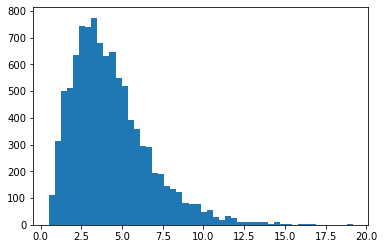

In [16]:
plt.hist(distances,bins=50)
plt.show()

In [17]:
np.quantile(distances,[0.999]) # deduct outlier concept

array([16.04048692])

In [18]:
indexs=np.where(distances>16.04048692)[0] # This are the outlier. 
                      # "<" Change this possition you can get "good prediction"

In [19]:
indexs

array([1017, 1782, 2004, 2215, 2836, 4140, 4601, 8015, 8116, 8254, 8561])

In [20]:
for (j,i) in enumerate([10,27,21]):
    print(j,i) # "j" is taken "index" "i" is taken the "value"

0 10
1 27
2 21


In [21]:
for (j,i) in enumerate(indexs[:10]):
    if j==0:
    
             tem=np.hstack([np.reshape(X_test_pred[i,:],(28,28)),np.reshape(X_test[i,:],(28,28))]) # x_test take "i"th image.        
    if j>=1:
        c=np.hstack([np.reshape(X_test_pred[i,:],(28,28)),np.reshape(X_test[i,:],(28,28))])

#         plt.imshow(c) # show the indigual images
#         plt.show()
        tem=np.vstack([tem,c]) # "tem" and "c" two image putting togather
    
    
    
    

In [22]:
np.hstack([np.reshape(X_test_pred[i,:],(28,28)),np.reshape(X_test[i,:],(28,28))])

array([[3.3460734e-13, 1.1483560e-13, 1.1330675e-13, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3243086e-13, 6.4055293e-13, 1.8215950e-11, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6417518e-11, 3.6288481e-12, 9.4440525e-13, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.2227087e-13, 3.1933633e-13, 5.0680540e-12, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.4368825e-13, 4.3472794e-13, 6.8541955e-13, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2203407e-13, 5.3807821e-13, 8.4913879e-13, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [23]:
tem.shape

(280, 56)

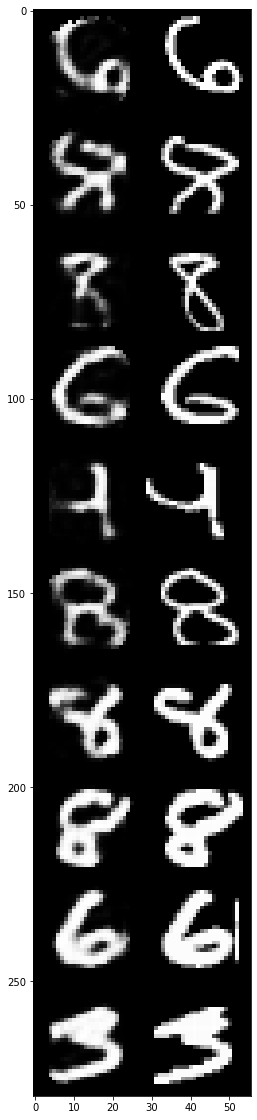

In [24]:
plt.figure(figsize=(10,20))
plt.imshow(tem,"gray") # Interconsaction is very high.

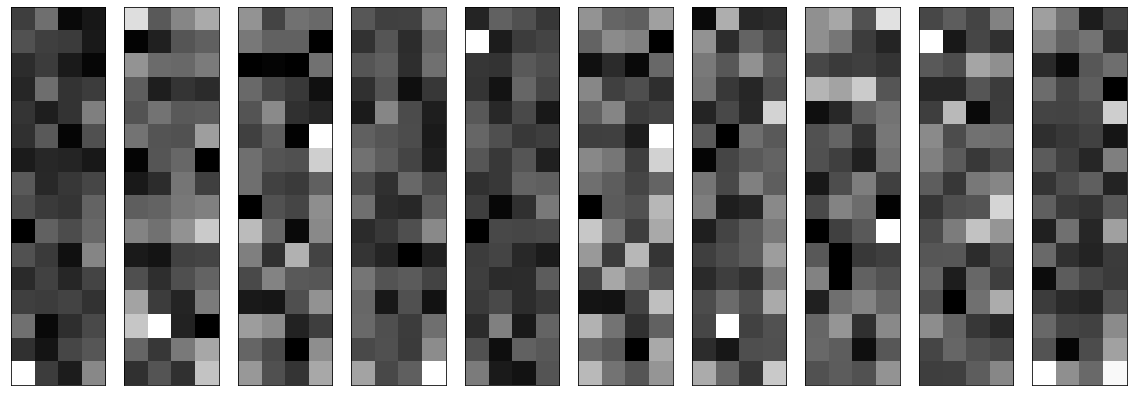

In [25]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Predict on the test set

In [26]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

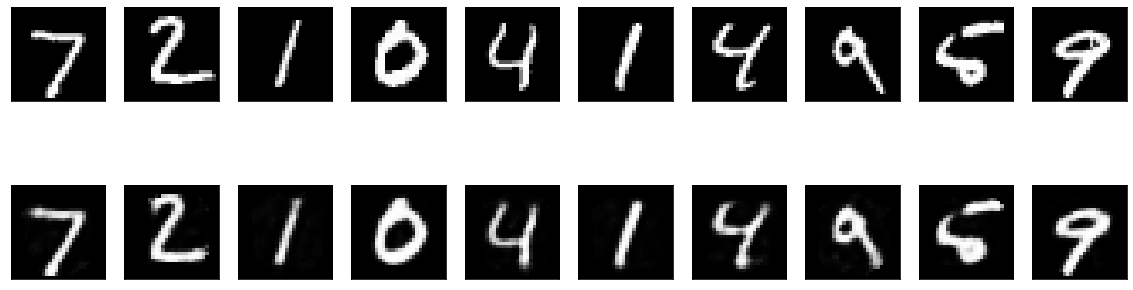

In [27]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['loss', 'val_loss'])


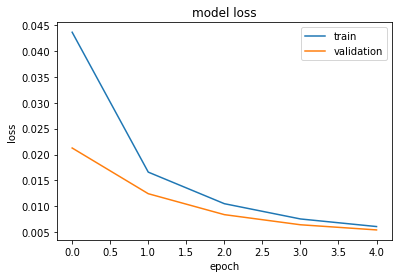

In [28]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

---

# **Multilayer autoencoder**

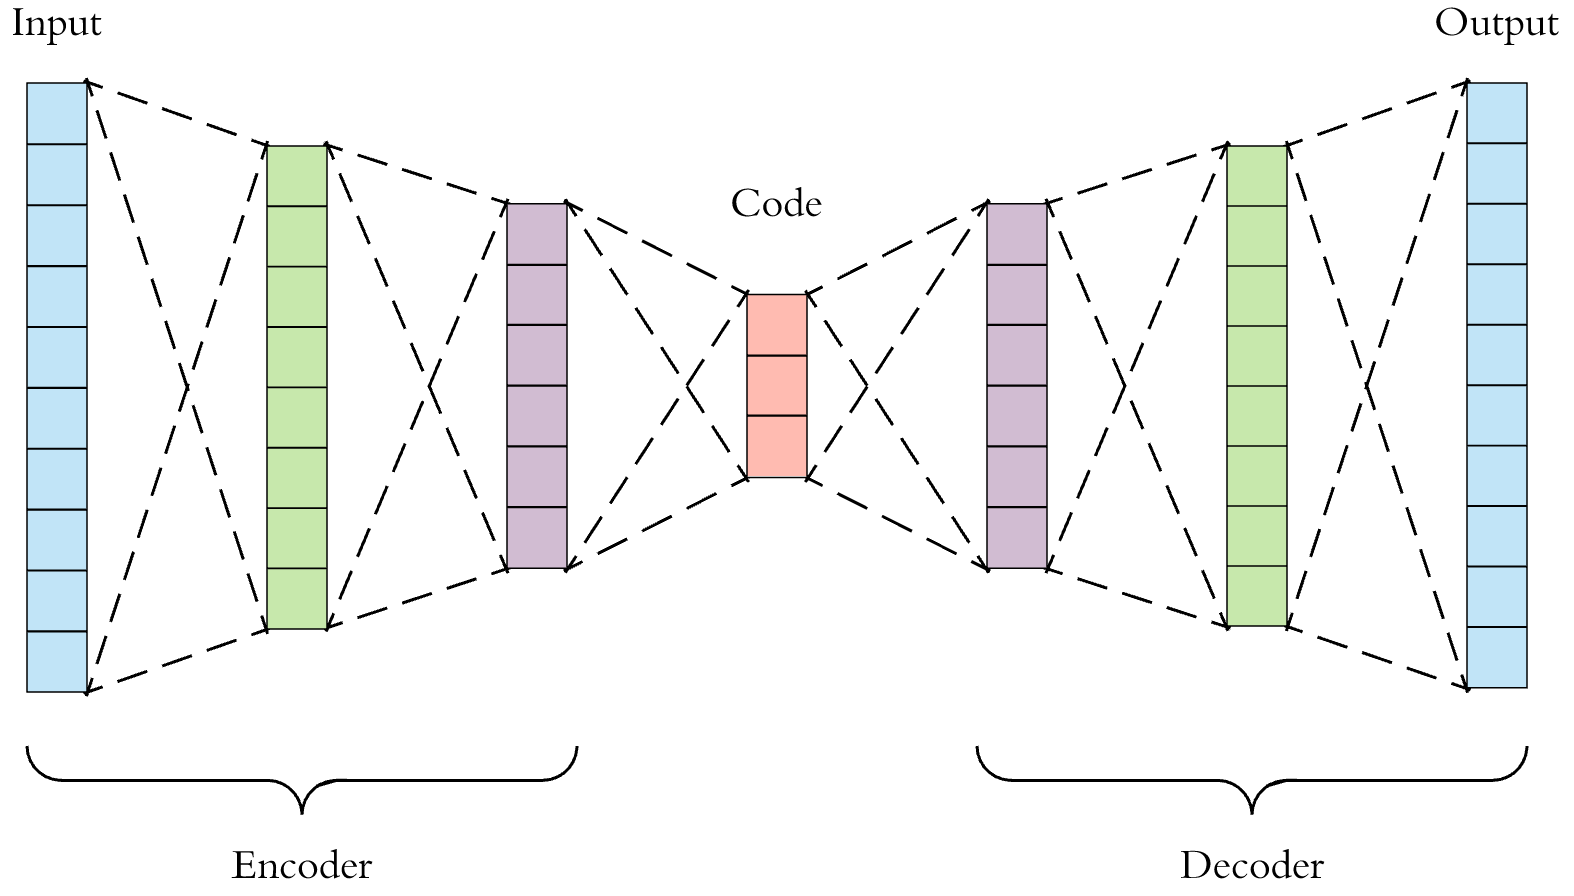

### Create the network

We extend the idea of the first network to more layers

In [67]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

### Train the network

In [68]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))
                        #  Input data, output data. Why both are train because input and output become same.          ^ this part given output data as well

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0408 - val_loss: 0.0184
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0151 - val_loss: 0.0123
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0115 - val_loss: 0.0099
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0086 - val_loss: 0.0079


### Predict on the test set

In [69]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

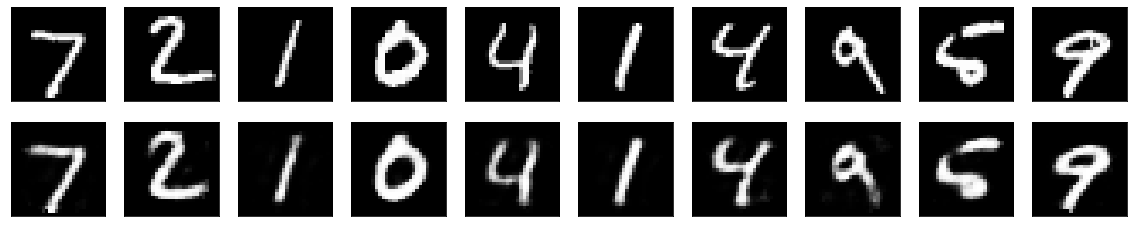

In [70]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['loss', 'val_loss'])


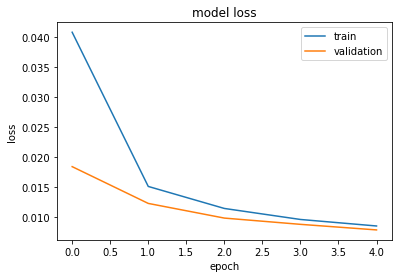

In [79]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

___

# **Convolutional autoencoder**

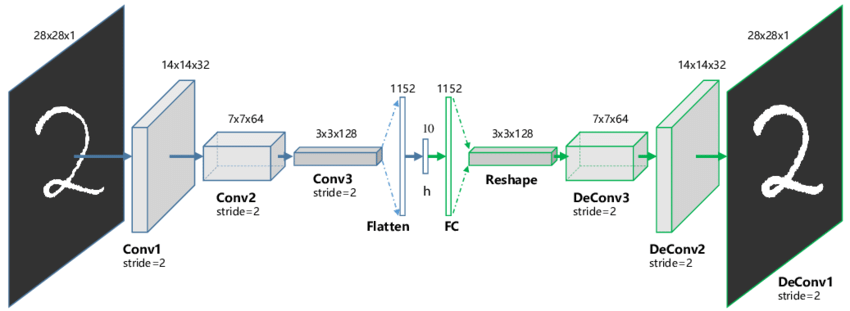

In [80]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)# }
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)   # } Taking the image    
X_train = X_train.astype("float32")/255. # Normalize the data
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples') # Show the diamention
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Create the network

This network does not take flattened vectors as an input but images

In [83]:
x = Input(shape=(28, 28,1)) 

# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), stride=2,padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2),stride=2, padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), stride=2,padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='mse') # adadelta = adam also work well

In [84]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0   

### Train

In [85]:
epochs = 10
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 40s 84ms/step - loss: 0.2325 - val_loss: 0.2320
Epoch 2/10
469/469 [==============================] - 35s 74ms/step - loss: 0.2312 - val_loss: 0.2306
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.2297 - val_loss: 0.2290
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 0.2279 - val_loss: 0.2270
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.2256 - val_loss: 0.2244
Epoch 6/10
469/469 [==============================] - 39s 84ms/step - loss: 0.2225 - val_loss: 0.2206
Epoch 7/10
469/469 [==============================] - 38s 81ms/step - loss: 0.2176 - val_loss: 0.2144
Epoch 8/10
469/469 [==============================] - 39s 83ms/step - loss: 0.2088 - val_loss: 0.2024
Epoch 9/10
469/469 [==============================] - 36s 78ms/step - loss: 0.1913 - val_loss: 0.1783
Epoch 10/10
469/469 [==============================] - 37s 78ms/step - loss: 0.160

In [86]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

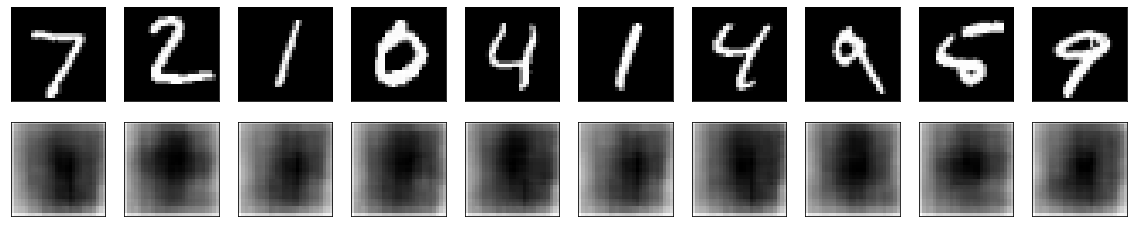

In [87]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

___

# **Regularized autoencoder**

Two types of regularization are described : 
- Sparse autoencoder
- Denoising autoencoder

## 1. Sparse autoencoder

### Create the network

In [ ]:
input_size = 784
hidden_size = 32
output_size = 784

In [ ]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
pip install pydot

In [ ]:
import pydotplus

In [ ]:
epochs = 15
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

### Predict on the test set

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## 2. Denoising autoencoder

In [75]:
(X_train, _), (X_test, _) = mnist.load_data() # What ever you don't want any part of thing simply put "_"

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

### Create noisy data

In [76]:
noise_factor = 0.1 # how much percentage you want noice. This position 50% of noise we have
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

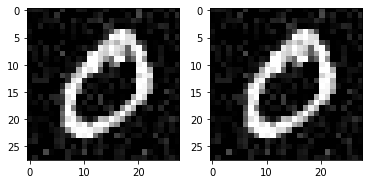

In [77]:
plt.subplot(1,2,1)
plt.imshow(X_train_noisy[1][:,:,0],"gray")
plt.subplot(1,2,2)
plt.imshow(X_train_noisy[1][:,:,0],"gray")

### Create the network

In [49]:
x = Input(shape=(28, 28, 1))

# Encoder
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
h = MaxPooling2D((2, 2), padding='same')(conv1_2)


# Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [50]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 32)        0   

### Train the network

In [57]:
epochs = 20
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))

Epoch 1/20
469/469 [==============================] - 56s 120ms/step - loss: 0.1411 - val_loss: 0.1399
Epoch 2/20
469/469 [==============================] - 55s 117ms/step - loss: 0.1360 - val_loss: 0.1357
Epoch 3/20
469/469 [==============================] - 56s 119ms/step - loss: 0.1322 - val_loss: 0.1325
Epoch 4/20
469/469 [==============================] - 55s 118ms/step - loss: 0.1294 - val_loss: 0.1300
Epoch 5/20
469/469 [==============================] - 55s 116ms/step - loss: 0.1270 - val_loss: 0.1279
Epoch 6/20
469/469 [==============================] - 56s 119ms/step - loss: 0.1251 - val_loss: 0.1261
Epoch 7/20
469/469 [==============================] - 53s 114ms/step - loss: 0.1234 - val_loss: 0.1245
Epoch 8/20
469/469 [==============================] - 55s 118ms/step - loss: 0.1219 - val_loss: 0.1231
Epoch 9/20
469/469 [==============================] - 54s 115ms/step - loss: 0.1205 - val_loss: 0.1218
Epoch 10/20
469/469 [==============================] - 53s 113ms/step - l

In [78]:
decoded_imgs = autoencoder.predict(X_test_noisy)

ValueError: in user code:

    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/somenath/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_6: expected shape=(None, 784), found shape=(None, 28, 28, 1)


### Plot

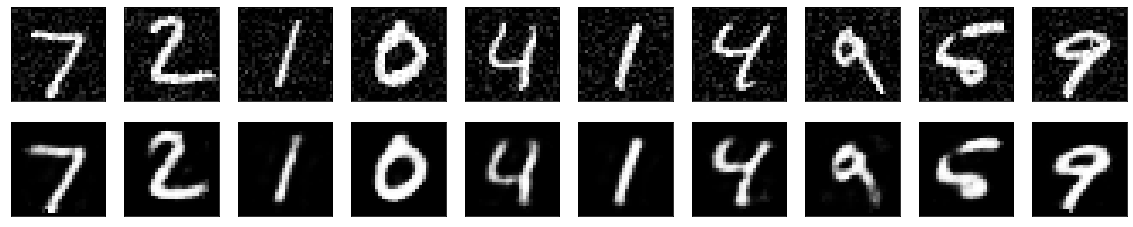

In [71]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['loss', 'val_loss'])


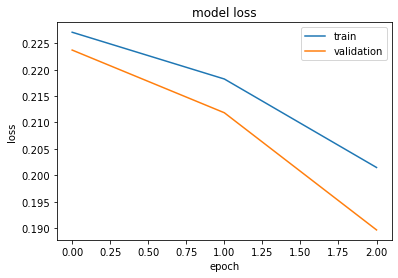

In [44]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:

!pip install ann_visualizer
!pip install graphviz

In [ ]:
You must install pydot and pygraphviz.

In [ ]:
pip install ann_visualizer

In [ ]:
mem1:100:1
mem2:150:3
mem3:170:2
mem4:180:1
    

In [ ]:
mem1:0.9:1
mem2:0.7:3
mem3:0.8:2
mem4:0.2:4
    

___

---